<a href="https://colab.research.google.com/github/Manprabh176/Manprabh176/blob/main/CancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BREAST CANCER DETECTION SYSTEM /CLASSIFICATION SYSTEM USING SINGLE HIDDEN LAYER NEURAL NETWORK


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset)


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data_frame=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)
data_frame.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#adding label column to the dataset
data_frame['label']=breast_cancer_dataset.target
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
#checking the distribution of target variable
data_frame['label'].value_counts()




label
1    357
0    212
Name: count, dtype: int64

In [ ]:
#seperating the features and target
X=data_frame.drop(columns='label',axis=1)
Y=data_frame['label']
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
#splitting the data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


In [ ]:
#standardizing the data (pre processing)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
#print(X_train_std)

In [ ]:
#BUILDING THE NEURAL NETWORK
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
#Setting up  layers of neural network
model=keras.Sequential([keras.layers.Flatten(input_shape=(30,)),keras.layers.Dense(20,activation='relu'),keras.layers.Dense(2,activation='sigmoid')])

In [ ]:
#Compiling the Neural Network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#training the Neural Network
history=model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 [==============================] - 2s 39ms/step - loss: 0.8773 - accuracy: 0.3252 - val_loss: 0.7140 - val_accuracy: 0.3696
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6335 - accuracy: 0.6381 - val_loss: 0.5256 - val_accuracy: 0.8043
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4809 - accuracy: 0.8289 - val_loss: 0.4110 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3881 - accuracy: 0.8826 - val_loss: 0.3370 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3255 - accuracy: 0.8973 - val_loss: 0.2853 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2794 - accuracy: 0.9144 - val_loss: 0.2480 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.9267 - val_loss: 0.2201 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

Text(0.5, 0, 'epochs')

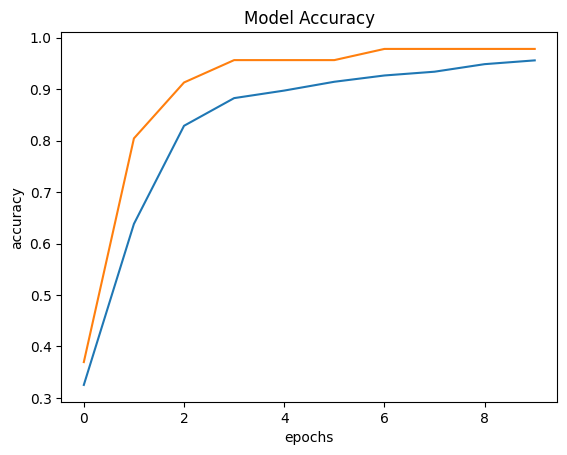

In [ ]:
#Visualising the Accuracy of model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")


In [ ]:
#Accuracy of the model on test data
loss,accuracy=model.evaluate(X_test_std,Y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.1556 - accuracy: 0.9737
0.9736841917037964


In [25]:
#Predictions
input_data=(17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
#change the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
input_data_std=scaler.transform(input_data_reshaped)
prediction=model.predict(input_data_std)
print(prediction)
prediction_label=[np.argmax(prediction)]
print(prediction_label)
if (prediction_label[0])==0:
  print("the tumour  is malignant")
else:
    print("the tumour is benign")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 161ms/step
[[0.72007585 0.04024376]]
[0]
the tumour  is malignant
